# Exploratory Data Analysis of Ethereum Transactions

This notebook performs an initial exploration of Ethereum transaction data to understand the dataset structure, identify patterns, and prepare for anomaly detection.

## Objectives

1. Load and understand the raw transaction data
2. Assess data quality and handle missing values
3. Explore the distribution of key transaction metrics
4. Identify patterns in transaction behavior
5. Generate initial insights about potential anomalies
6. Prepare the data for feature engineering

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import os
import json
import warnings
from IPython.display import display

# Visualization settings
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
warnings.filterwarnings('ignore')
%matplotlib inline

# Set random seed for reproducibility
np.random.seed(42)

## 1. Loading the Dataset

We'll start by loading the Ethereum transaction dataset and examining its structure.

In [2]:
# Load the raw transaction data
data_path = os.path.join('/Users/paty/Projectos/eth-analysis-proyect/data/raw/eth_transactions.csv')


print(f"Loading data from {data_path}")
transactions_df = pd.read_csv(data_path)

# Display basic information about the dataset
print(f"\nDataset shape: {transactions_df.shape}")
print("\nFirst few rows:")
display(transactions_df.head())

Loading data from /Users/paty/Projectos/eth-analysis-proyect/data/raw/eth_transactions.csv

Dataset shape: (100000, 18)

First few rows:


,tx_hash,block_number,timestamp,from_address,to_address,value_eth,gas_limit,gas_used,gas_price_gwei,transaction_fee,nonce,tx_index,is_contract_interaction,input_data,input_data_length,transaction_status,anomaly_flag,transaction_type
0,0x5f5aed2d49988dc71c8654ea6f360c89d8a392cc1fb4...,11228319,2020-05-17 03:51:05,0xc38767d0add8fedecd039f884aa0133b939a7066,0x986db649edfc1a967ce179046376371fe6dbb053,0.199463,27493,24308,91,2501863,399,157,0,0x3faa3ce1b1e3a27457e75fdd2499dcd4a78d3d6a0ed7...,61,Success,0,transfer
1,0xa1c7b2ffa011d85d2f2ab4a0478753451cf3782986dc...,2115830,2015-10-13 13:35:05,0xe0e4ae57f97328d049eb549d2cc1a48c4e201889,0x4d9dc03c0d625dff9710b6fa610ae411df34c819,0.488429,21648,21531,38,822624,641,4,0,0x59ca93dae6a8f1393260cced15a73817843e23d5bbab...,77,Success,0,transfer
2,0x5b4dd74a21ac2159f18e208d1dbee2f6a7da5c2206df...,5081656,2016-03-27 23:20:41,0x93c3fa08a1fde21581e425f4e6ec4daa07a2ad08,0x957b0a62a45da424708502b3f901b81c23580e8f,0.017459,22872,21511,101,2310072,874,14,0,0x7916d80bdf07ea6011fef8c6a6066fa7db4f3a4fc774...,78,Success,0,transfer
3,0xb63dffab8befb74f16b67788d269e1c9d2785ff00a4a...,10338213,2019-08-30 20:57:00,0x692da4c8b2fbc7ebe8dd1286274c69006dc9df62,0xaa38fc30918eaaf321db15b89c073467421b98ae,0.049798,21209,21064,96,2036064,586,189,0,0x0c32c7fb549b8eefc4cd31d92f00ec75d065310e52bc...,86,Success,0,transfer
4,0xe43bb03652e525a462c0af56957314f7d7bf11193578...,5900905,2023-10-21 18:54:39,0xbf5b74ff929e7bbe2846d710a93e4087a18359fe,0x19a6f603505d3aa3b52692d44b95ef5e53fe63b2,1.764244,23005,21988,124,2852620,476,113,0,0x3470edf7b216a0442737b1790edfc1150fcc6b851ae4...,51,Success,0,transfer


## 2. Data Preprocessing and Cleaning

Let's preprocess the data to make it more suitable for analysis:

1. Convert data types
2. Handle missing values
3. Calculate derived metrics
4. Check for duplicates

In [3]:
# Make a copy of the original data
df = transactions_df.copy()

# Convert timestamp to datetime
if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'])

# Convert value from wei to ETH (1 ETH = 10^18 wei)
if 'value' in df.columns:
    df['value_eth'] = df['value'] / 10**18

# Convert gas price from wei to gwei (1 gwei = 10^9 wei)
if 'gas_price' in df.columns:
    df['gas_price_gwei'] = df['gas_price'] / 10**9

# Calculate transaction fee in ETH
if 'gas_used' in df.columns and 'gas_price' in df.columns:
    df['transaction_fee'] = (df['gas_used'] * df['gas_price']) / 10**18

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Handle missing values
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':
            df[col] = df[col].fillna('unknown')
        else:
            df[col] = df[col].fillna(0)

# Check for duplicates
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")

if duplicate_count > 0:
    df = df.drop_duplicates()
    print(f"Removed {duplicate_count} duplicate rows.")

# Display the processed data
print("\nProcessed data:")
display(df.head())

# Display basic statistics
print("\nBasic statistics of numerical columns:")
display(df.describe())


Missing values in each column:
tx_hash                    0
block_number               0
timestamp                  0
from_address               0
to_address                 0
value_eth                  0
gas_limit                  0
gas_used                   0
gas_price_gwei             0
transaction_fee            0
nonce                      0
tx_index                   0
is_contract_interaction    0
input_data                 0
input_data_length          0
transaction_status         0
anomaly_flag               0
transaction_type           0
dtype: int64

Number of duplicate rows: 0

Processed data:


,tx_hash,block_number,timestamp,from_address,to_address,value_eth,gas_limit,gas_used,gas_price_gwei,transaction_fee,nonce,tx_index,is_contract_interaction,input_data,input_data_length,transaction_status,anomaly_flag,transaction_type
0,0x5f5aed2d49988dc71c8654ea6f360c89d8a392cc1fb4...,11228319,2020-05-17 03:51:05,0xc38767d0add8fedecd039f884aa0133b939a7066,0x986db649edfc1a967ce179046376371fe6dbb053,0.199463,27493,24308,91,2501863,399,157,0,0x3faa3ce1b1e3a27457e75fdd2499dcd4a78d3d6a0ed7...,61,Success,0,transfer
1,0xa1c7b2ffa011d85d2f2ab4a0478753451cf3782986dc...,2115830,2015-10-13 13:35:05,0xe0e4ae57f97328d049eb549d2cc1a48c4e201889,0x4d9dc03c0d625dff9710b6fa610ae411df34c819,0.488429,21648,21531,38,822624,641,4,0,0x59ca93dae6a8f1393260cced15a73817843e23d5bbab...,77,Success,0,transfer
2,0x5b4dd74a21ac2159f18e208d1dbee2f6a7da5c2206df...,5081656,2016-03-27 23:20:41,0x93c3fa08a1fde21581e425f4e6ec4daa07a2ad08,0x957b0a62a45da424708502b3f901b81c23580e8f,0.017459,22872,21511,101,2310072,874,14,0,0x7916d80bdf07ea6011fef8c6a6066fa7db4f3a4fc774...,78,Success,0,transfer
3,0xb63dffab8befb74f16b67788d269e1c9d2785ff00a4a...,10338213,2019-08-30 20:57:00,0x692da4c8b2fbc7ebe8dd1286274c69006dc9df62,0xaa38fc30918eaaf321db15b89c073467421b98ae,0.049798,21209,21064,96,2036064,586,189,0,0x0c32c7fb549b8eefc4cd31d92f00ec75d065310e52bc...,86,Success,0,transfer
4,0xe43bb03652e525a462c0af56957314f7d7bf11193578...,5900905,2023-10-21 18:54:39,0xbf5b74ff929e7bbe2846d710a93e4087a18359fe,0x19a6f603505d3aa3b52692d44b95ef5e53fe63b2,1.764244,23005,21988,124,2852620,476,113,0,0x3470edf7b216a0442737b1790edfc1150fcc6b851ae4...,51,Success,0,transfer



Basic statistics of numerical columns:


,block_number,value_eth,gas_limit,gas_used,gas_price_gwei,transaction_fee,nonce,tx_index,is_contract_interaction,input_data_length,anomaly_flag
count,1.000000e+05,100000.000000,1.000000e+05,1.000000e+05,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,8.013472e+06,1.002982,3.719688e+05,3.184246e+05,99.848580,3.761247e+07,499.985180,99.484510,0.300270,57.164030,0.078160
std,4.054195e+06,1.002921,1.353867e+06,1.289919e+06,57.422927,1.589639e+08,288.672155,57.673136,0.458378,26.323187,0.268425
min,1.000114e+06,0.000001,2.100000e+04,2.151000e+03,1.000000,2.100300e+04,0.000000,0.000000,0.000000,12.000000,0.000000
25%,4.495908e+06,0.291855,2.437100e+04,2.195600e+04,50.000000,1.783046e+06,250.000000,49.000000,0.000000,34.000000,0.000000
50%,8.017964e+06,0.694970,2.772300e+04,2.419400e+04,100.000000,3.536189e+06,501.000000,100.000000,0.000000,57.000000,0.000000
75%,1.154289e+07,1.386466,1.723962e+05,6.292400e+04,150.000000,1.059922e+07,750.000000,149.000000,1.000000,80.000000,0.000000
max,1.499984e+07,11.637929,7.999502e+06,7.965680e+06,199.000000,1.580878e+09,999.000000,199.000000,1.000000,102.000000,1.000000


## 3. Exploratory Data Analysis

Now let's explore the data to understand the distribution of key metrics and identify patterns.

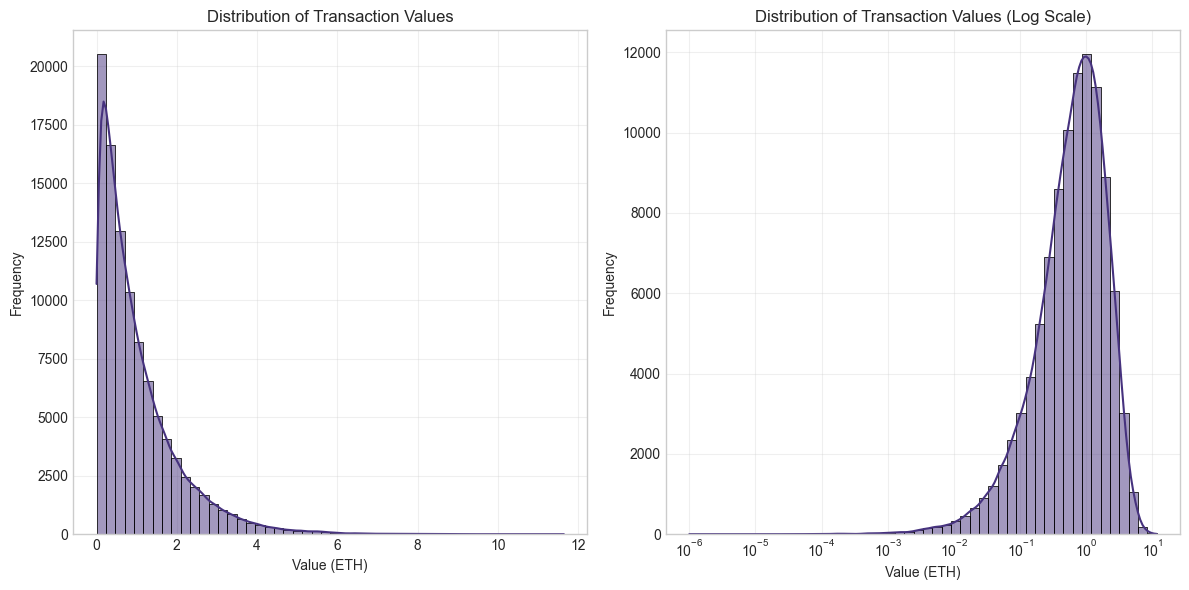

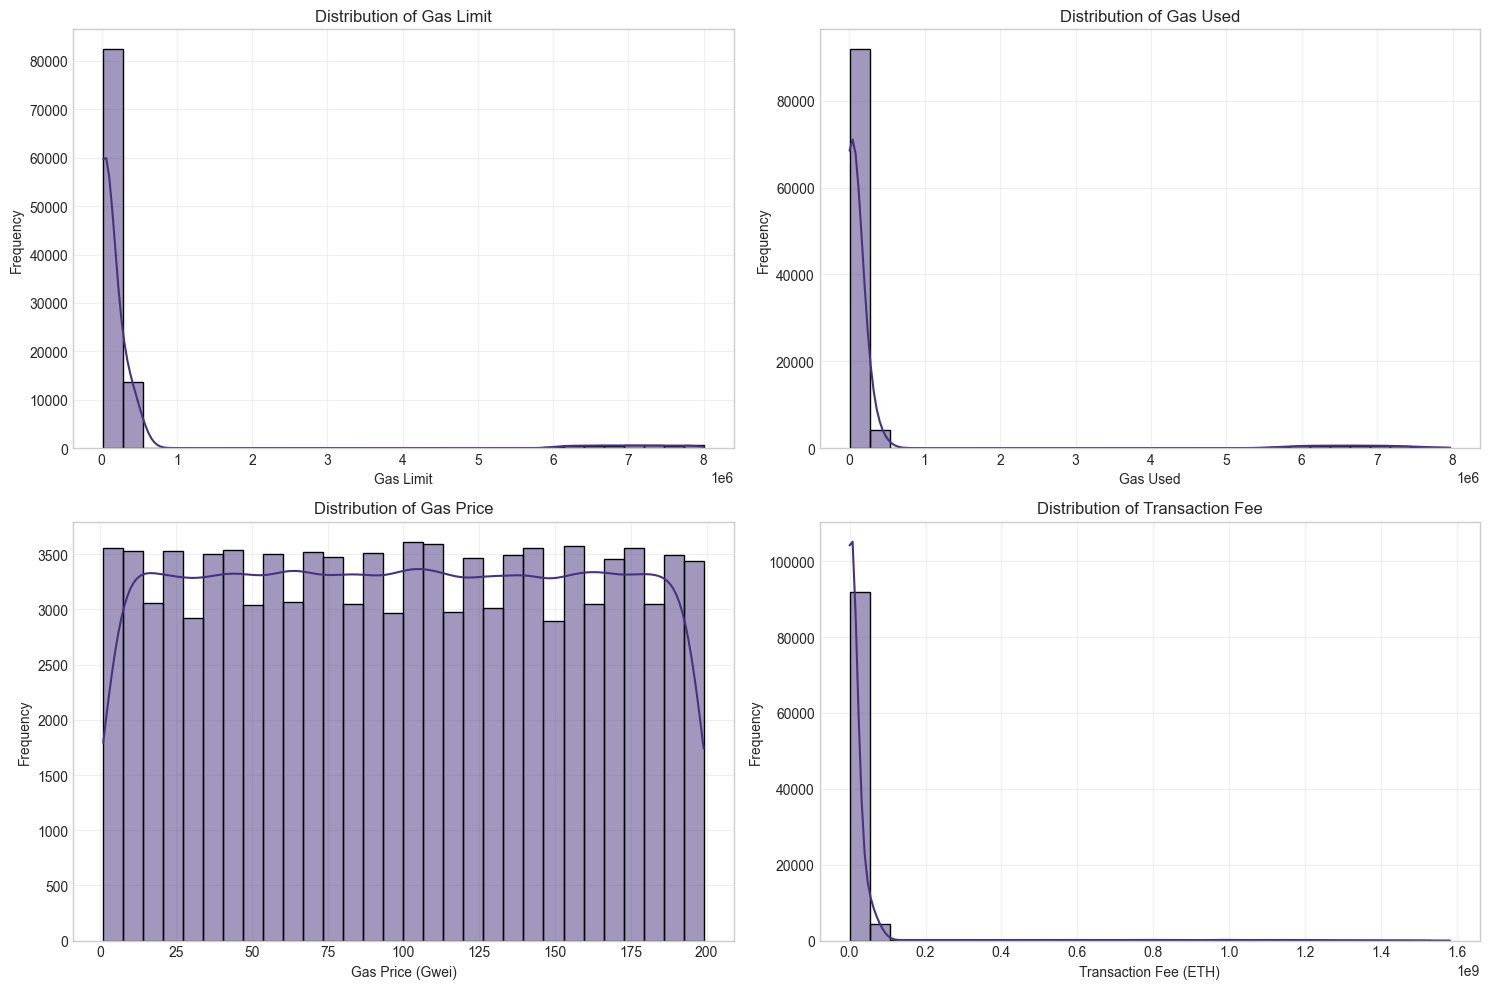

In [4]:
# 3.1 Distribution of transaction values
plt.figure(figsize=(12, 6))

# Plot histogram of transaction values (log scale for better visualization)
plt.subplot(1, 2, 1)
sns.histplot(df['value_eth'], bins=50, kde=True)
plt.title('Distribution of Transaction Values')
plt.xlabel('Value (ETH)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# Log scale for better visualization of the long tail
plt.subplot(1, 2, 2)
sns.histplot(df['value_eth'][df['value_eth'] > 0], bins=50, kde=True, log_scale=True)
plt.title('Distribution of Transaction Values (Log Scale)')
plt.xlabel('Value (ETH)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 3.2 Distribution of gas metrics
plt.figure(figsize=(15, 10))

# Gas limit
plt.subplot(2, 2, 1)
sns.histplot(df['gas_limit'], bins=30, kde=True)
plt.title('Distribution of Gas Limit')
plt.xlabel('Gas Limit')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# Gas used
plt.subplot(2, 2, 2)
sns.histplot(df['gas_used'], bins=30, kde=True)
plt.title('Distribution of Gas Used')
plt.xlabel('Gas Used')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# Gas price
plt.subplot(2, 2, 3)
sns.histplot(df['gas_price_gwei'], bins=30, kde=True)
plt.title('Distribution of Gas Price')
plt.xlabel('Gas Price (Gwei)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# Transaction fee
plt.subplot(2, 2, 4)
sns.histplot(df['transaction_fee'], bins=30, kde=True)
plt.title('Distribution of Transaction Fee')
plt.xlabel('Transaction Fee (ETH)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 3.3 Temporal Analysis

Let's analyze how transaction patterns change over time.

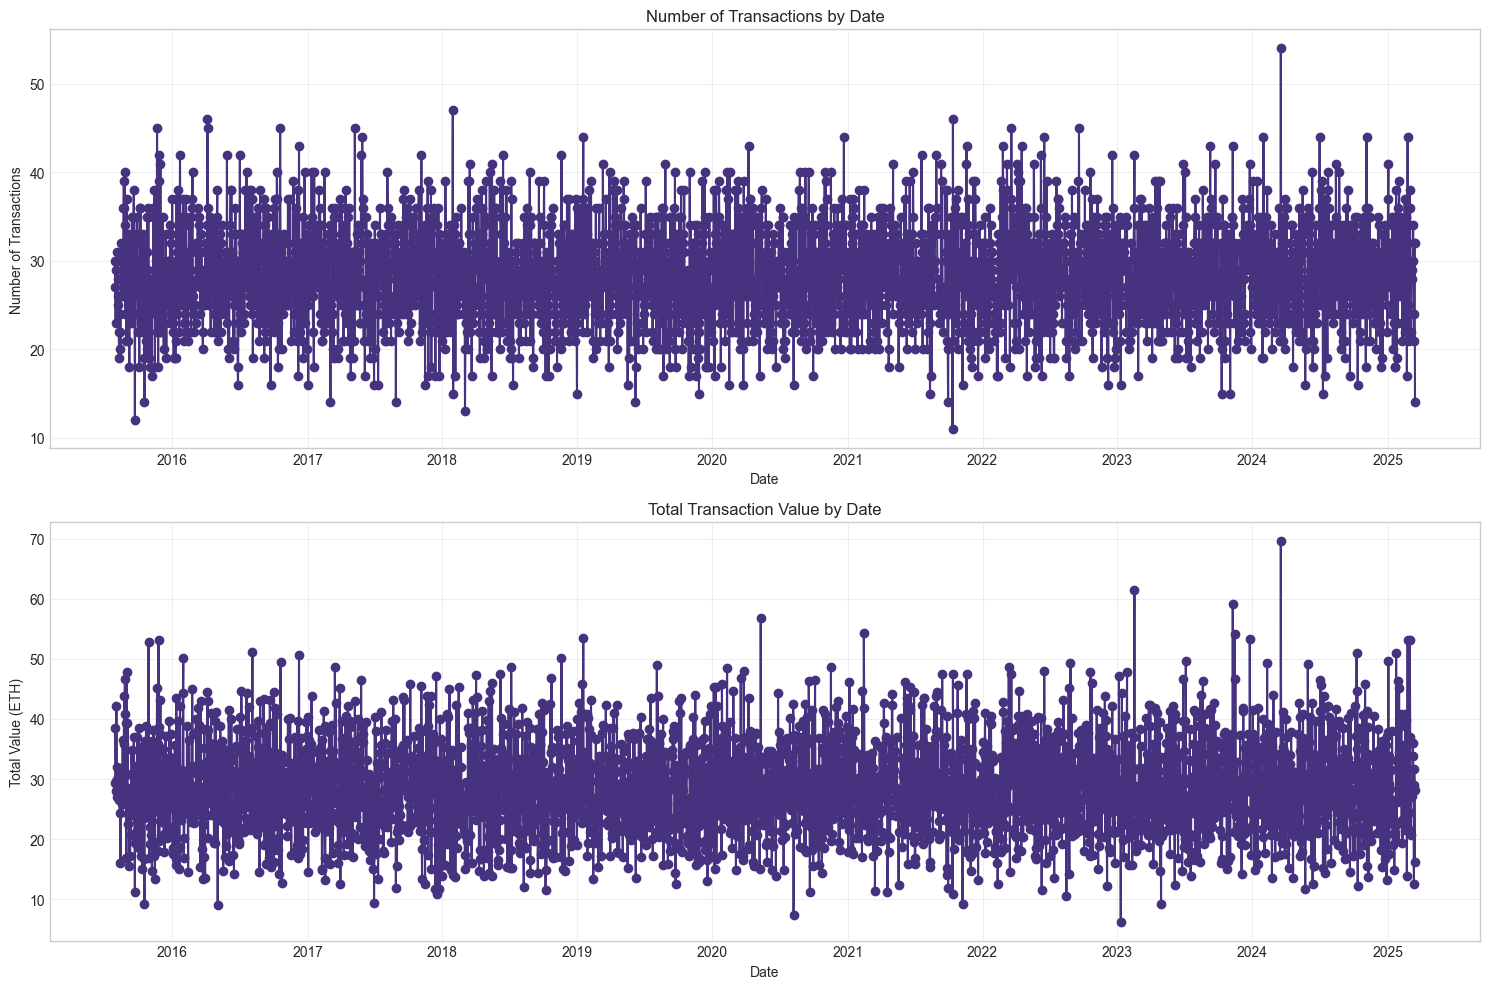

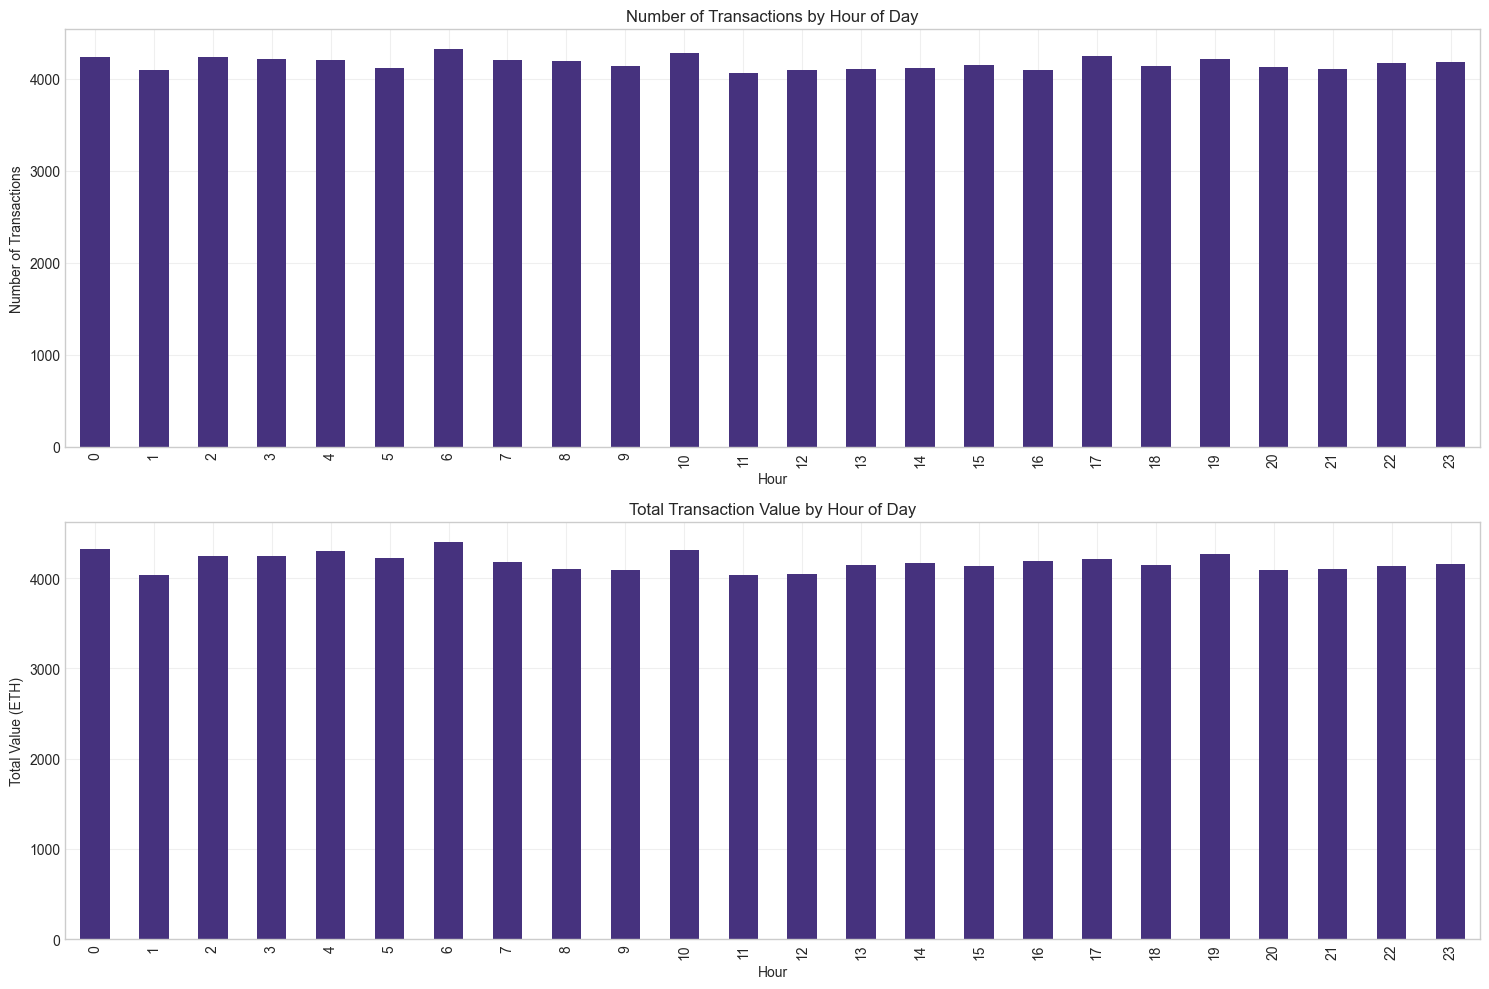

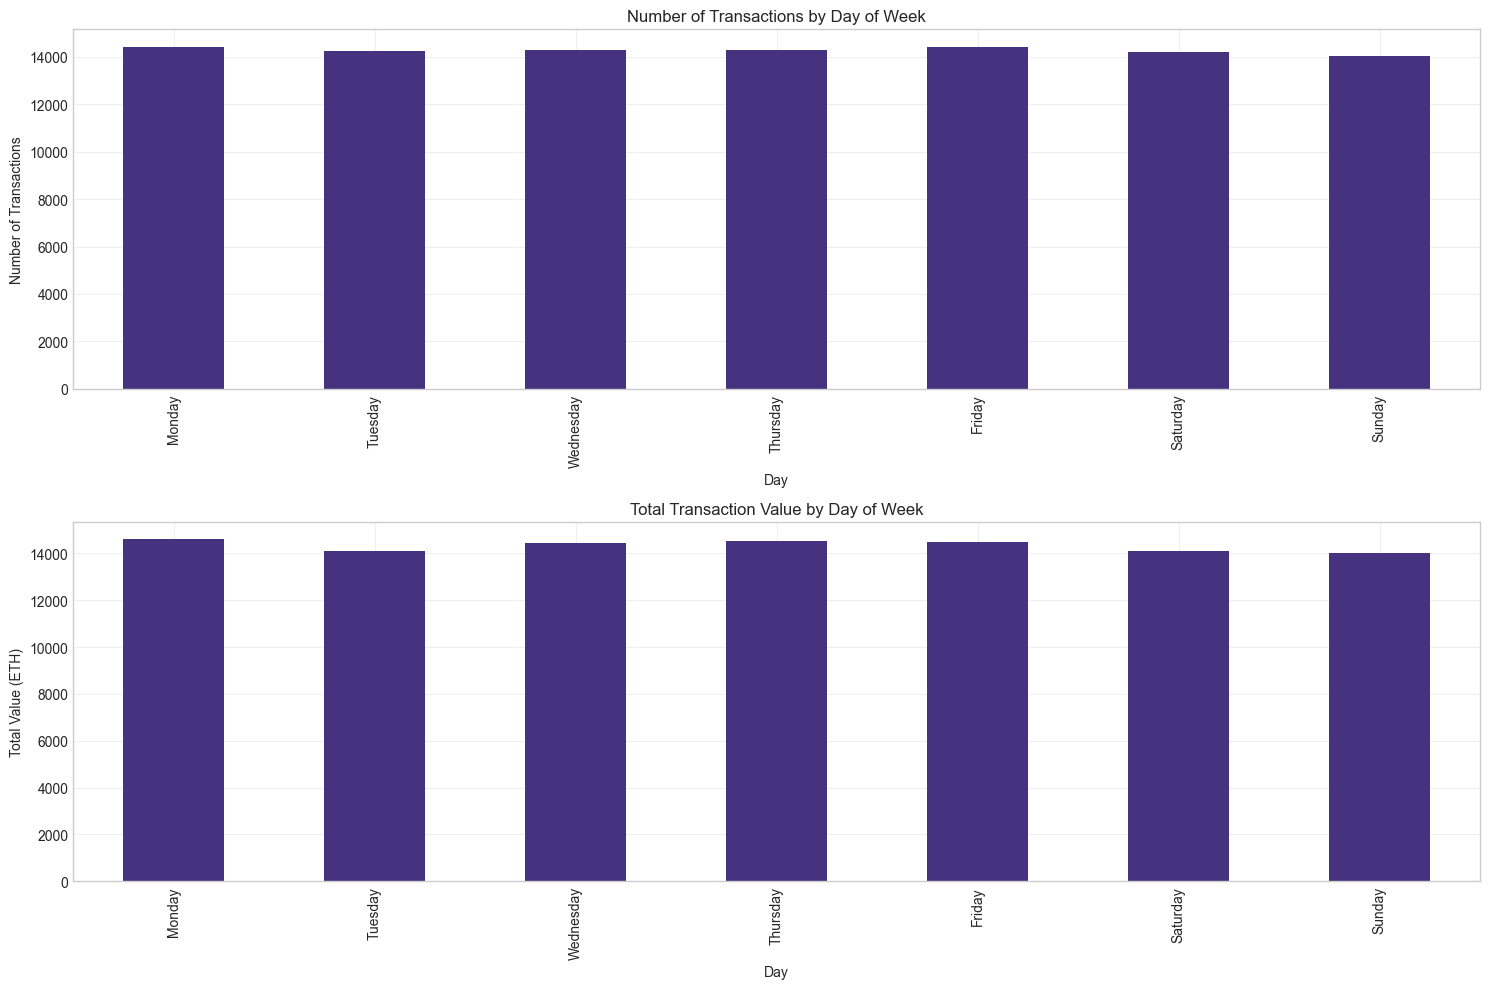

In [5]:
# Convert timestamp to datetime if not already
if df['timestamp'].dtype != 'datetime64[ns]':
    df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract time components
df['date'] = df['timestamp'].dt.date
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['day_name'] = df['timestamp'].dt.day_name()

# Transactions by date
daily_transactions = df.groupby('date').size()
daily_value = df.groupby('date')['value_eth'].sum()

plt.figure(figsize=(15, 10))

# Number of transactions by date
plt.subplot(2, 1, 1)
daily_transactions.plot(kind='line', marker='o')
plt.title('Number of Transactions by Date')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True, alpha=0.3)

# Total value by date
plt.subplot(2, 1, 2)
daily_value.plot(kind='line', marker='o')
plt.title('Total Transaction Value by Date')
plt.xlabel('Date')
plt.ylabel('Total Value (ETH)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Transactions by hour of day
hourly_transactions = df.groupby('hour').size()
hourly_value = df.groupby('hour')['value_eth'].sum()

plt.figure(figsize=(15, 10))

# Number of transactions by hour
plt.subplot(2, 1, 1)
hourly_transactions.plot(kind='bar')
plt.title('Number of Transactions by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Transactions')
plt.grid(True, alpha=0.3)
plt.xticks(range(24))

# Total value by hour
plt.subplot(2, 1, 2)
hourly_value.plot(kind='bar')
plt.title('Total Transaction Value by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Total Value (ETH)')
plt.grid(True, alpha=0.3)
plt.xticks(range(24))

plt.tight_layout()
plt.show()

# Transactions by day of week
weekly_transactions = df.groupby('day_name').size()
weekly_value = df.groupby('day_name')['value_eth'].sum()

# Reorder days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_transactions = weekly_transactions.reindex(day_order)
weekly_value = weekly_value.reindex(day_order)

plt.figure(figsize=(15, 10))

# Number of transactions by day of week
plt.subplot(2, 1, 1)
weekly_transactions.plot(kind='bar')
plt.title('Number of Transactions by Day of Week')
plt.xlabel('Day')
plt.ylabel('Number of Transactions')
plt.grid(True, alpha=0.3)

# Total value by day of week
plt.subplot(2, 1, 2)
weekly_value.plot(kind='bar')
plt.title('Total Transaction Value by Day of Week')
plt.xlabel('Day')
plt.ylabel('Total Value (ETH)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 3.4 Transaction Type Analysis

Let's analyze the different types of transactions and their characteristics.

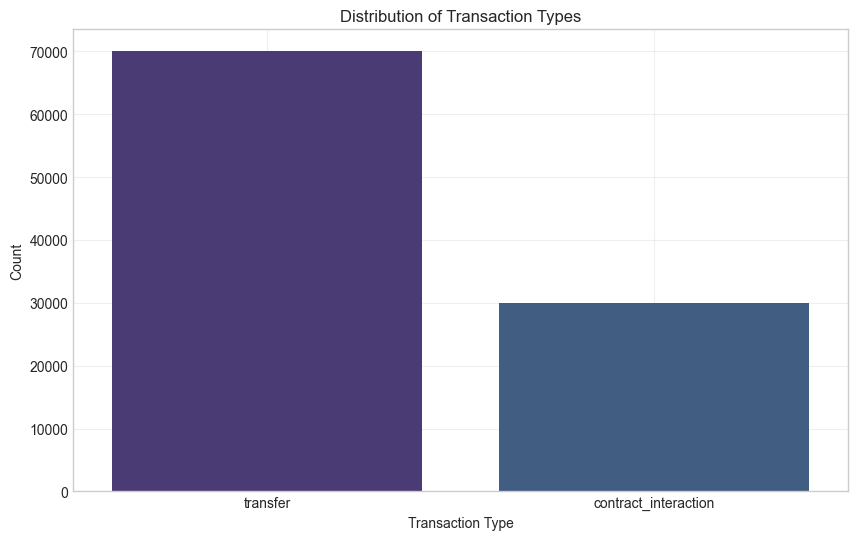

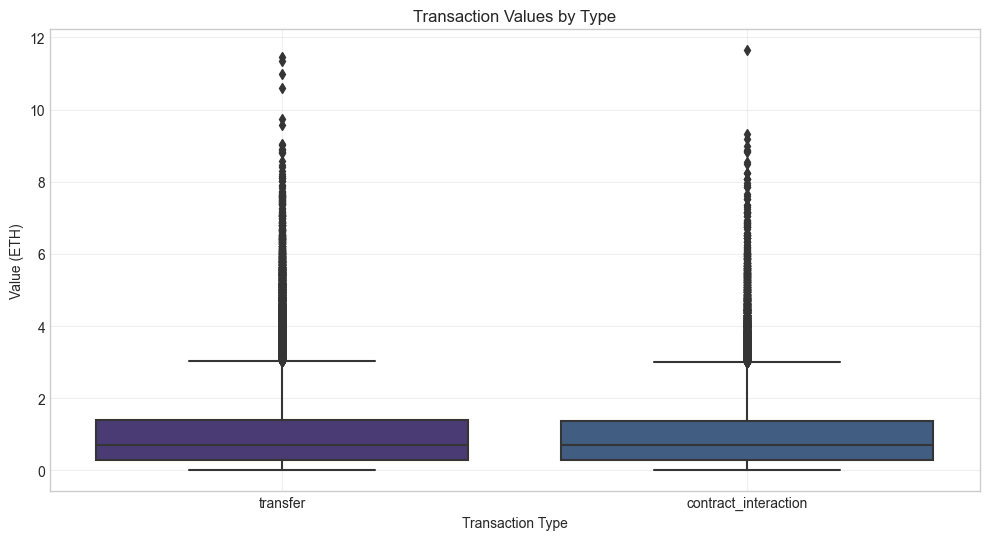

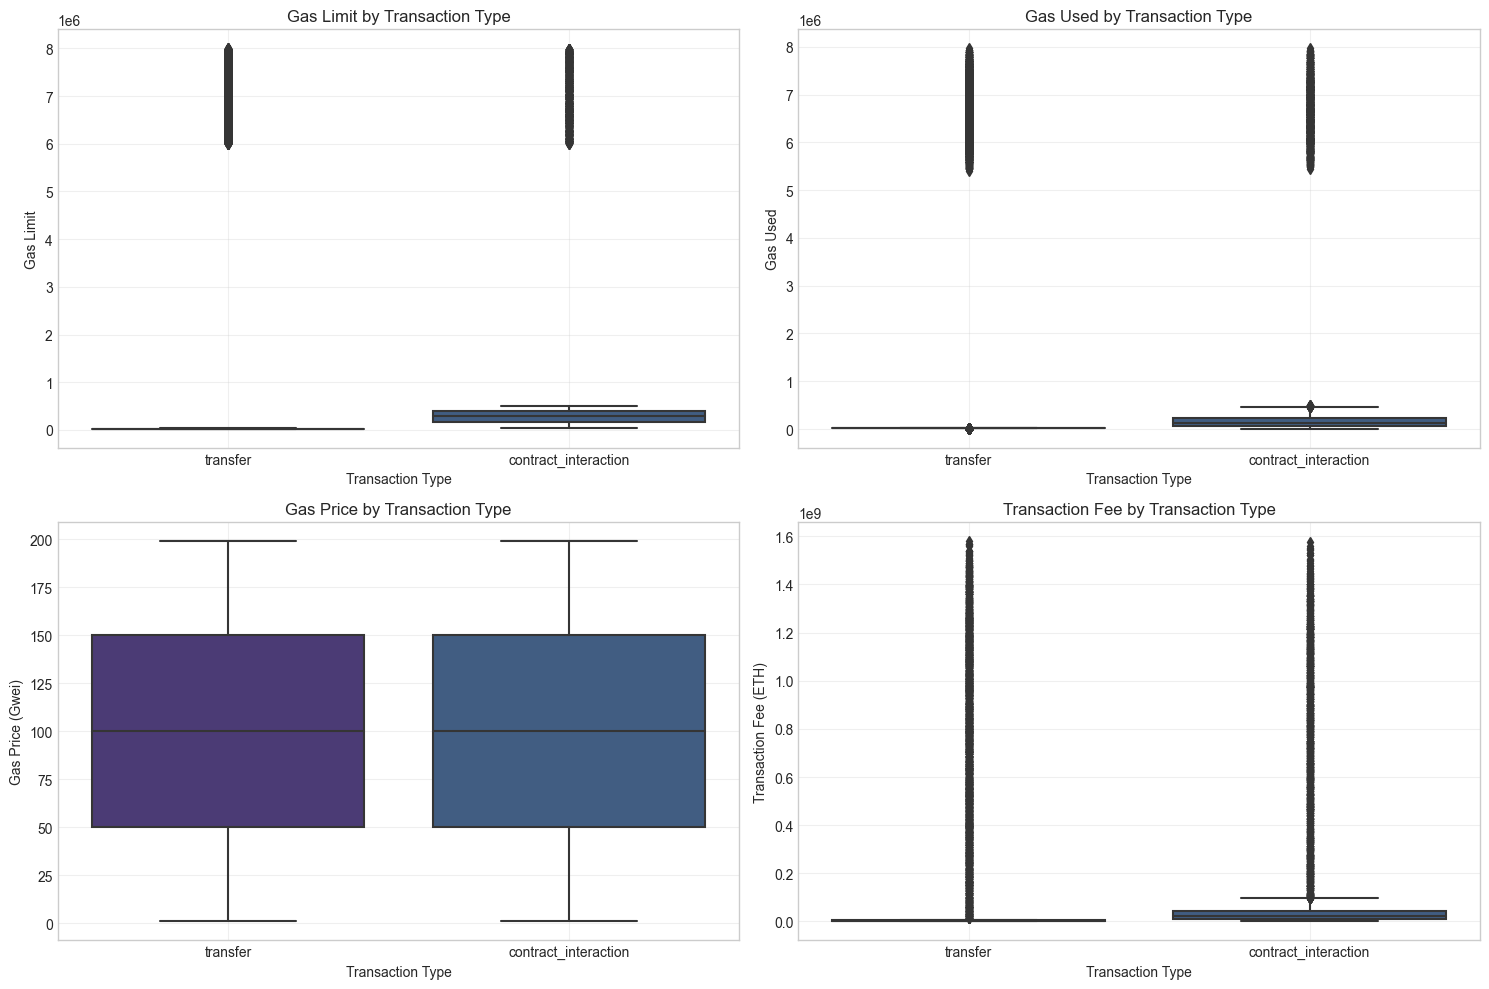

In [6]:
# Distribution of transaction types
if 'transaction_type' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='transaction_type', data=df)
    plt.title('Distribution of Transaction Types')
    plt.xlabel('Transaction Type')
    plt.ylabel('Count')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # Compare transaction values by type
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='transaction_type', y='value_eth', data=df)
    plt.title('Transaction Values by Type')
    plt.xlabel('Transaction Type')
    plt.ylabel('Value (ETH)')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # Compare gas metrics by transaction type
    plt.figure(figsize=(15, 10))
    
    # Gas limit by type
    plt.subplot(2, 2, 1)
    sns.boxplot(x='transaction_type', y='gas_limit', data=df)
    plt.title('Gas Limit by Transaction Type')
    plt.xlabel('Transaction Type')
    plt.ylabel('Gas Limit')
    plt.grid(True, alpha=0.3)
    
    # Gas used by type
    plt.subplot(2, 2, 2)
    sns.boxplot(x='transaction_type', y='gas_used', data=df)
    plt.title('Gas Used by Transaction Type')
    plt.xlabel('Transaction Type')
    plt.ylabel('Gas Used')
    plt.grid(True, alpha=0.3)
    
    # Gas price by type
    plt.subplot(2, 2, 3)
    sns.boxplot(x='transaction_type', y='gas_price_gwei', data=df)
    plt.title('Gas Price by Transaction Type')
    plt.xlabel('Transaction Type')
    plt.ylabel('Gas Price (Gwei)')
    plt.grid(True, alpha=0.3)
    
    # Transaction fee by type
    plt.subplot(2, 2, 4)
    sns.boxplot(x='transaction_type', y='transaction_fee', data=df)
    plt.title('Transaction Fee by Transaction Type')
    plt.xlabel('Transaction Type')
    plt.ylabel('Transaction Fee (ETH)')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

### 3.5 Address Analysis

Let's analyze the transaction patterns of different addresses.

Top 10 'from' addresses by transaction count:


0x7f264590c938464dab47f8476687ade467a638cf    136
0xa2295bc757931a260b62f5d745cf925bf4458108    132
0x3076d253ad1364e218202fb2c4d1b00e6a50c8e8    130
0xafc24a526e9c8c2594fc74a6535d4e11c8de53e3    129
0x28f3cf56c788a62dd71e43a80d30332d85ca0c7a    127
0x22b00c1a90e2edc37716a8c228d18f93cd53406d    126
0xbd68b72e64380fced1383c1f60e40fbe29b1cbad    126
0xa1164bd8a4d1e5c2567b2b5b60c91a95ffbb5272    124
0x3b1be1975afc6659f5013ee246bdc7f0bed2a821    124
0x55306a2dcba43037777e760fee4076a69587ed75    123
Name: from_address, dtype: int64


Top 10 'to' addresses by transaction count:


0x692da4c8b2fbc7ebe8dd1286274c69006dc9df62    136
0x8fefca8787e83c1cc9c2d7a6463c88701084a20a    132
0xa5a0fa6cf604889976c985016f1f2473777b54c1    132
0x00b1a791f5fcf0fbbff33d7a0dd1e422df92dfa4    132
0x478b1a52d76c3c5815c5a2c63c667dc5020cf15f    130
0xbedc3368f710f029c182d61721aff3faa21dad6b    129
0xac17e2a89c144b722f1d855b8aa65d0499e0b211    129
0x6b3de5be25bded60e35fface2dbb9d94d830eb9c    129
0x4073e50aeda218b143f471204c5b1c0da2579e1d    127
0x3076d253ad1364e218202fb2c4d1b00e6a50c8e8    126
Name: to_address, dtype: int64


Top 10 'from' addresses by total value sent:


from_address
0x03e5330250cec5f1e355be36888b33c32d626085    142.012380
0x9556033b6d2be754829dd284e11080969e88f7c5    138.575387
0x28f3cf56c788a62dd71e43a80d30332d85ca0c7a    138.500131
0xa2295bc757931a260b62f5d745cf925bf4458108    138.392455
0x52d5545fd1b7fc4cf6e29137df1fc16e68bc2268    138.035779
0x3076d253ad1364e218202fb2c4d1b00e6a50c8e8    134.150008
0xd5325175c864b3aed3815de474f7d96f535be181    133.673041
0x7cd348b9f83f5c073d115aa01bf7c408b2851e2b    133.275590
0x63b9e5f26b427873665d606600be1a4081d99f0b    132.905242
0x694fa87d301f17e101a012331faa703595d409ad    132.821520
Name: value_eth, dtype: float64


Top 10 'to' addresses by total value received:


to_address
0x00b1a791f5fcf0fbbff33d7a0dd1e422df92dfa4    151.033622
0x7b936dd8ed2a503cf0c9b6af7b6f36c2c5081d2a    147.953318
0x50cddfe317a18ca87755bb746e9033d64e9e5821    146.614663
0x3b1be1975afc6659f5013ee246bdc7f0bed2a821    142.696053
0x68eb41e49322b96878a33cd17b19088925813918    140.388476
0xdb4912142b86262abaf872570502df87a6d710c4    139.525766
0xa6f142ea78ae5ef25abd9fcd6def88948fbac75d    139.348092
0xa5a0fa6cf604889976c985016f1f2473777b54c1    139.188769
0x52faa05fea621ae19567909c4694802e0509ba8f    138.951529
0x17bbe29d4bd59a763ffd050c5796916eefdeb432    137.633286
Name: value_eth, dtype: float64

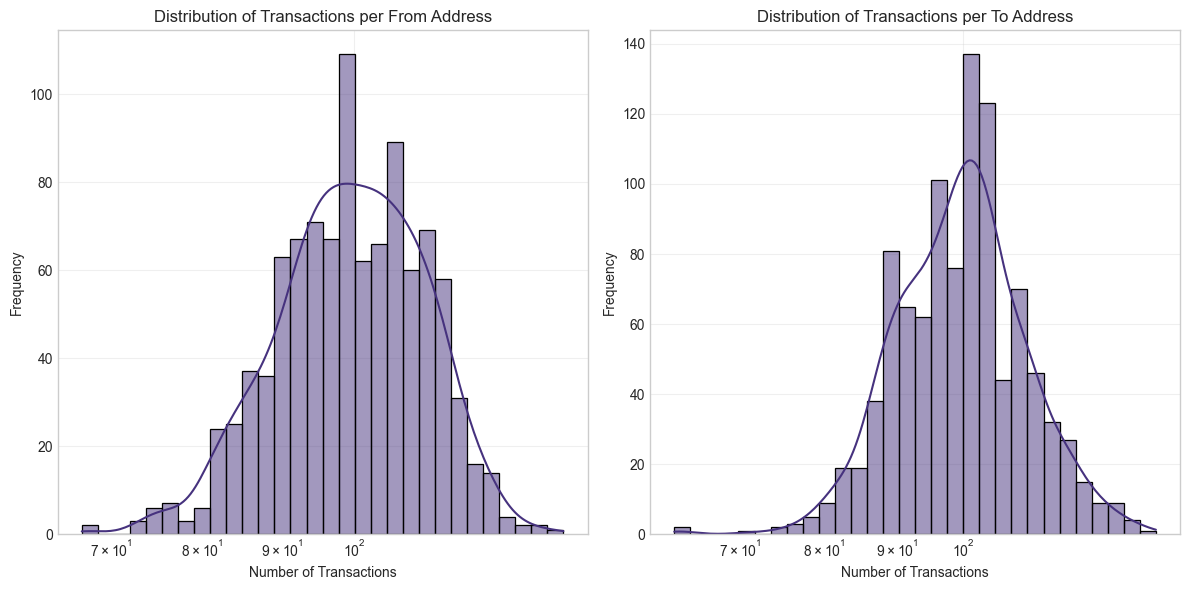

In [7]:
# Count transactions per address
from_address_counts = df['from_address'].value_counts()
to_address_counts = df['to_address'].value_counts()

# Top addresses by transaction count
print("Top 10 'from' addresses by transaction count:")
display(from_address_counts.head(10))

print("\nTop 10 'to' addresses by transaction count:")
display(to_address_counts.head(10))

# Calculate total value sent and received per address
from_address_values = df.groupby('from_address')['value_eth'].sum()
to_address_values = df.groupby('to_address')['value_eth'].sum()

# Top addresses by transaction value
print("\nTop 10 'from' addresses by total value sent:")
display(from_address_values.sort_values(ascending=False).head(10))

print("\nTop 10 'to' addresses by total value received:")
display(to_address_values.sort_values(ascending=False).head(10))

# Visualize distribution of transaction counts
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(from_address_counts.values, bins=30, kde=True, log_scale=True)
plt.title('Distribution of Transactions per From Address')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
sns.histplot(to_address_counts.values, bins=30, kde=True, log_scale=True)
plt.title('Distribution of Transactions per To Address')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 3.6 Correlation Analysis

Let's analyze the correlations between different transaction metrics.

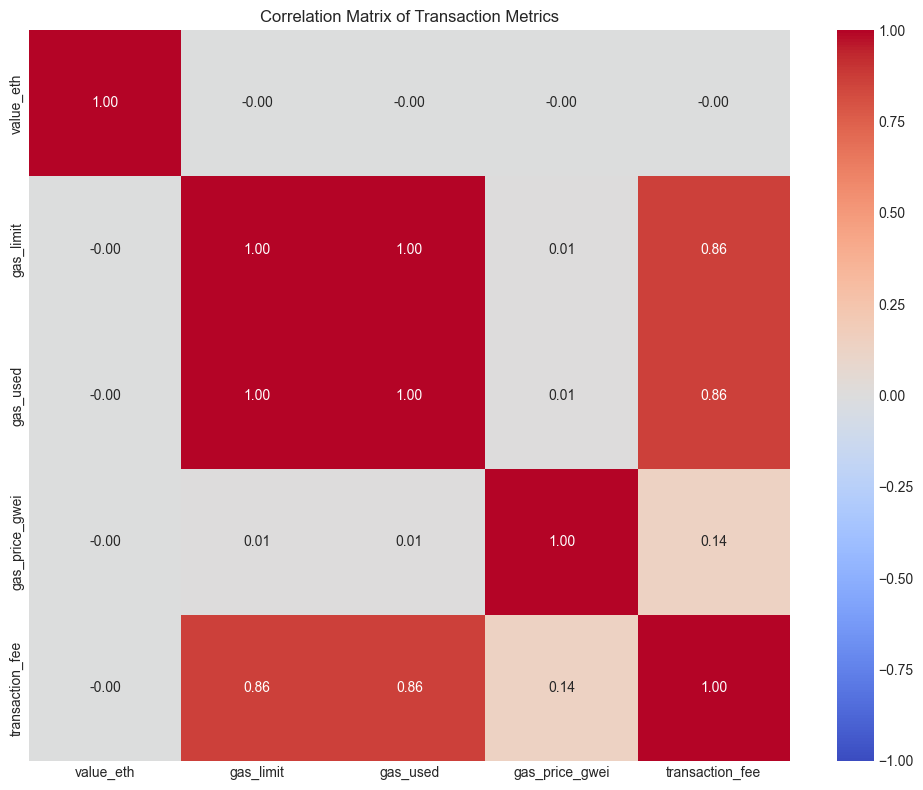

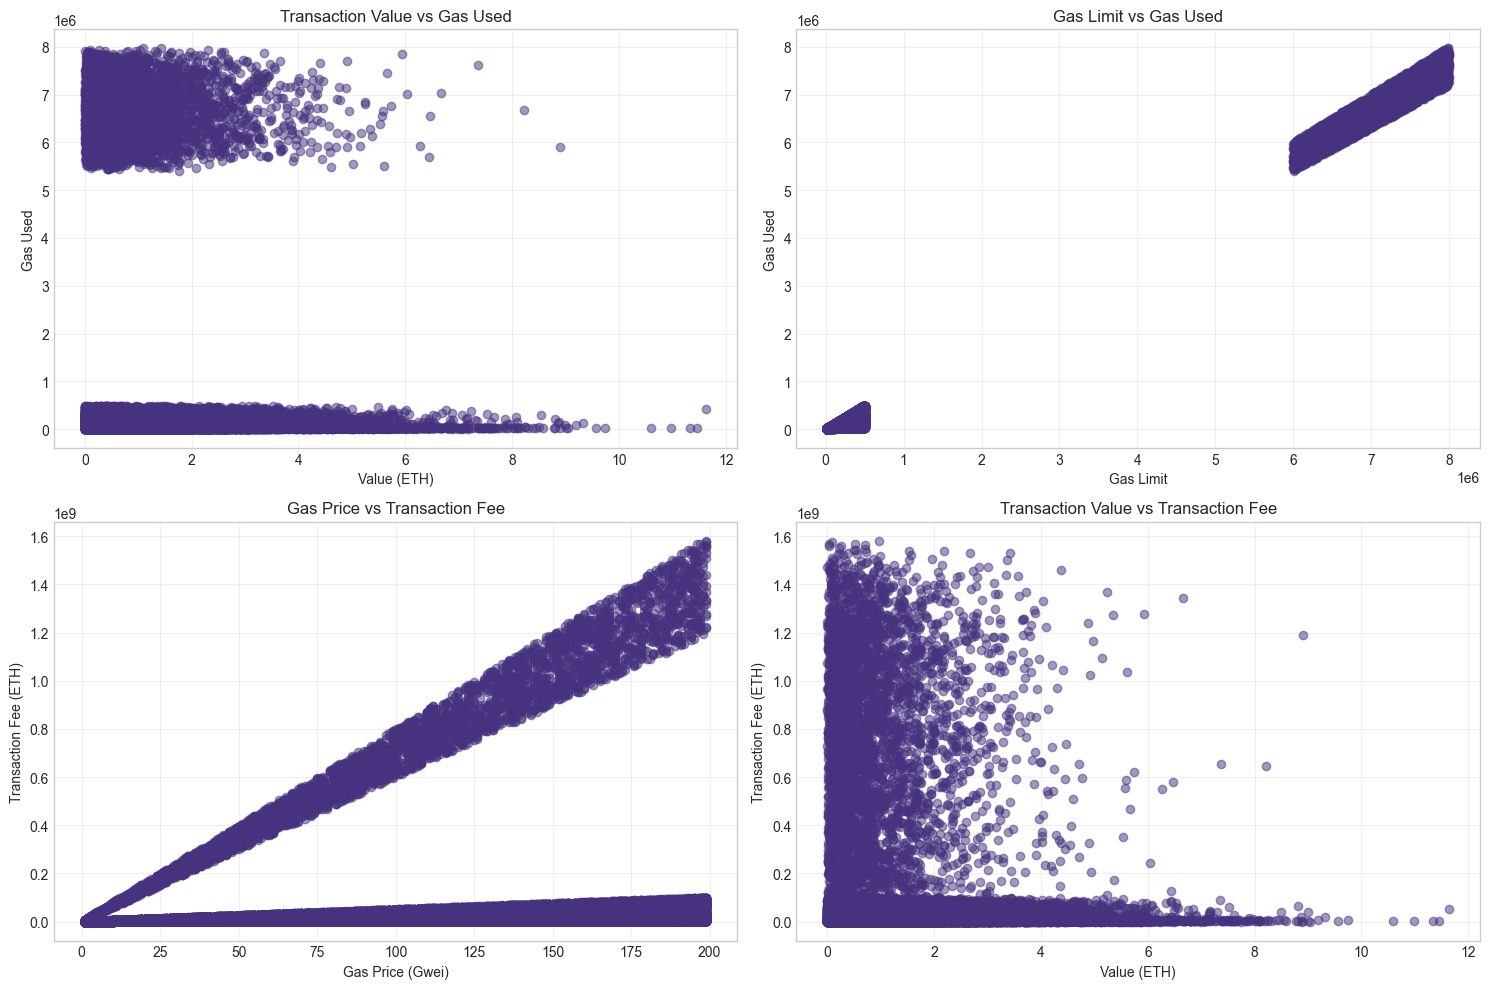

In [8]:
# Select numerical columns for correlation analysis
numerical_cols = ['value_eth', 'gas_limit', 'gas_used', 'gas_price_gwei', 'transaction_fee']
correlation_df = df[numerical_cols]

# Calculate correlation matrix
corr_matrix = correlation_df.corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix of Transaction Metrics')
plt.tight_layout()
plt.show()

# Scatter plots for key correlations
plt.figure(figsize=(15, 10))

# Value vs Gas Used
plt.subplot(2, 2, 1)
plt.scatter(df['value_eth'], df['gas_used'], alpha=0.5)
plt.title('Transaction Value vs Gas Used')
plt.xlabel('Value (ETH)')
plt.ylabel('Gas Used')
plt.grid(True, alpha=0.3)

# Gas Limit vs Gas Used
plt.subplot(2, 2, 2)
plt.scatter(df['gas_limit'], df['gas_used'], alpha=0.5)
plt.title('Gas Limit vs Gas Used')
plt.xlabel('Gas Limit')
plt.ylabel('Gas Used')
plt.grid(True, alpha=0.3)

# Gas Price vs Transaction Fee
plt.subplot(2, 2, 3)
plt.scatter(df['gas_price_gwei'], df['transaction_fee'], alpha=0.5)
plt.title('Gas Price vs Transaction Fee')
plt.xlabel('Gas Price (Gwei)')
plt.ylabel('Transaction Fee (ETH)')
plt.grid(True, alpha=0.3)

# Value vs Transaction Fee
plt.subplot(2, 2, 4)
plt.scatter(df['value_eth'], df['transaction_fee'], alpha=0.5)
plt.title('Transaction Value vs Transaction Fee')
plt.xlabel('Value (ETH)')
plt.ylabel('Transaction Fee (ETH)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Initial Anomaly Detection

Let's perform some basic anomaly detection to identify potentially suspicious transactions.

Number of outliers in transaction value: 4901
Number of outliers in gas price: 0
Number of transactions with gas usage ratio > 95%: 29779
Number of transactions with fee > 10% of value: 100000


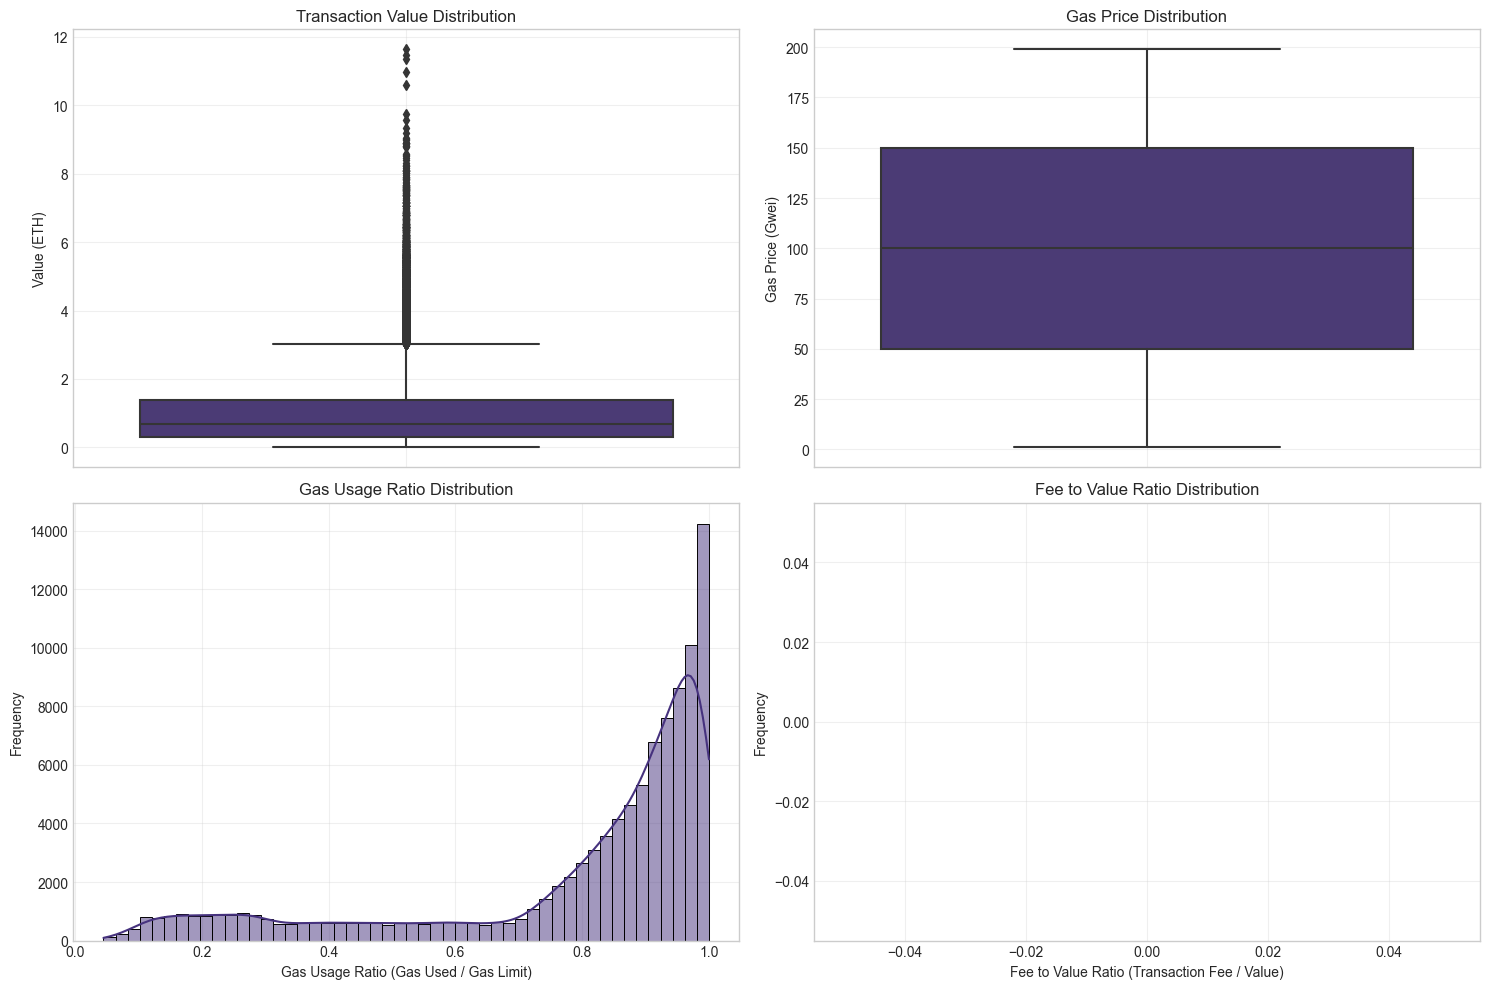

In [9]:
# 4.1 Identify outliers in transaction values
Q1_value = df['value_eth'].quantile(0.25)
Q3_value = df['value_eth'].quantile(0.75)
IQR_value = Q3_value - Q1_value

lower_bound_value = Q1_value - 1.5 * IQR_value
upper_bound_value = Q3_value + 1.5 * IQR_value

value_outliers = df[(df['value_eth'] < lower_bound_value) | (df['value_eth'] > upper_bound_value)]
print(f"Number of outliers in transaction value: {len(value_outliers)}")

# 4.2 Identify outliers in gas price
Q1_gas = df['gas_price_gwei'].quantile(0.25)
Q3_gas = df['gas_price_gwei'].quantile(0.75)
IQR_gas = Q3_gas - Q1_gas

lower_bound_gas = Q1_gas - 1.5 * IQR_gas
upper_bound_gas = Q3_gas + 1.5 * IQR_gas

gas_outliers = df[(df['gas_price_gwei'] < lower_bound_gas) | (df['gas_price_gwei'] > upper_bound_gas)]
print(f"Number of outliers in gas price: {len(gas_outliers)}")

# 4.3 Identify transactions with unusually high gas usage ratio
df['gas_usage_ratio'] = df['gas_used'] / df['gas_limit']
high_gas_ratio = df[df['gas_usage_ratio'] > 0.95]
print(f"Number of transactions with gas usage ratio > 95%: {len(high_gas_ratio)}")

# 4.4 Identify transactions with unusually high transaction fee relative to value
df['fee_to_value_ratio'] = df['transaction_fee'] / df['value_eth']
df['fee_to_value_ratio'] = df['fee_to_value_ratio'].replace([np.inf, -np.inf], np.nan)
df['fee_to_value_ratio'] = df['fee_to_value_ratio'].fillna(0)

high_fee_ratio = df[df['fee_to_value_ratio'] > 0.1]  # Fee > 10% of value
print(f"Number of transactions with fee > 10% of value: {len(high_fee_ratio)}")

# Visualize potential anomalies
plt.figure(figsize=(15, 10))

# Transaction value outliers
plt.subplot(2, 2, 1)
sns.boxplot(y=df['value_eth'])
plt.title('Transaction Value Distribution')
plt.ylabel('Value (ETH)')
plt.grid(True, alpha=0.3)

# Gas price outliers
plt.subplot(2, 2, 2)
sns.boxplot(y=df['gas_price_gwei'])
plt.title('Gas Price Distribution')
plt.ylabel('Gas Price (Gwei)')
plt.grid(True, alpha=0.3)

# Gas usage ratio
plt.subplot(2, 2, 3)
sns.histplot(df['gas_usage_ratio'], bins=50, kde=True)
plt.title('Gas Usage Ratio Distribution')
plt.xlabel('Gas Usage Ratio (Gas Used / Gas Limit)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# Fee to value ratio
plt.subplot(2, 2, 4)
sns.histplot(df['fee_to_value_ratio'][df['fee_to_value_ratio'] < 1], bins=50, kde=True)
plt.title('Fee to Value Ratio Distribution')
plt.xlabel('Fee to Value Ratio (Transaction Fee / Value)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Initial Insights on Potential Triangulation Patterns

Let's look for potential triangulation patterns in the transaction data. Triangulation typically involves a series of transactions that form a cycle, where funds originate from an address and eventually return to the same address after passing through one or more intermediary addresses.

Found 288185 triangles in the sample.
Triangle 1: ('0x56dbb7f6fa8c8c86bb13994af9b1b573af097792', '0x815af237184d46f1d86ff3d30b592d8c53f8512a', '0xcea8293f9f4c29adfa566bcc15d026eb7c60b299')
Triangle 2: ('0x4640b9aaf1cf4f904c960629d70492f3eb4ccbcb', '0x7eb10192e2694c3747f24124c265d23165862752', '0x8aae54e30b27bfe2398ef4de26787dc8e27aa0af')
Triangle 3: ('0x3d64f4ff09c4d8d3f72185b65127e15e6d270f13', '0x3de1f92bdbb97576eeb923579a98d667b1534a10', '0xf47505becde91ab0fda273bf5b3fafeae7f84ae6')
Triangle 4: ('0x55306a2dcba43037777e760fee4076a69587ed75', '0xb02eee6f713c023dc436cd70c9baaa98ae66708e', '0xf9a3d302d340790bb5ccd6bd26202d612166b2bb')
Triangle 5: ('0x60e94162315e4e327e876e0d344904615587fd79', '0xe677f5b043533e59da24bfdabccd94ba23916f43', '0xf59ef5c3592510f99a66ed08b70b374abfa949f5')


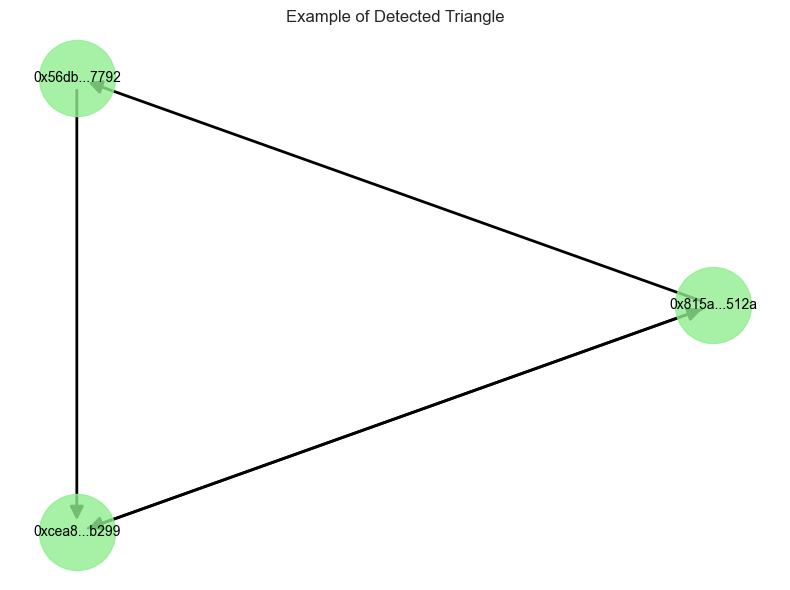

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# For performance reasons, we use a sample of the data (e.g., 5000 rows)
sample_size = min(100000, len(df))
sample_df = df.sample(sample_size, random_state=42)

# Create a directed graph from the sample data
G = nx.DiGraph()
for _, row in sample_df.iterrows():
    G.add_edge(row['from_address'], row['to_address'], weight=row['value_eth'])

# Custom algorithm to detect triangles (cycles of length 3)
triangles = set()
for u in G.nodes():
    for v in G.successors(u):
        for w in G.successors(v):
            if w != u and G.has_edge(w, u):
                # Sort the nodes to avoid duplicate triangles
                triangle = tuple(sorted([u, v, w]))
                triangles.add(triangle)

print(f"Found {len(triangles)} triangles in the sample.")

# Save the detected triangles as triangulation candidates
triangulation_candidates = list(triangles)

# Display a few examples of detected triangles
for i, triangle in enumerate(list(triangles)[:5]):
    print(f"Triangle {i+1}: {triangle}")

# Visualize an example triangle if any exist
if triangles:
    sample_triangle = list(triangles)[0]
    triangle_subgraph = G.subgraph(sample_triangle)
    
    plt.figure(figsize=(8, 6))
    pos = nx.circular_layout(triangle_subgraph)
    nx.draw_networkx_nodes(triangle_subgraph, pos, node_size=3000, node_color='lightgreen', alpha=0.8)
    nx.draw_networkx_edges(triangle_subgraph, pos, width=2, arrowsize=20)
    # Shorten labels for readability
    labels = {node: f"{node[:6]}...{node[-4:]}" for node in triangle_subgraph.nodes()}
    nx.draw_networkx_labels(triangle_subgraph, pos, labels, font_size=10)
    plt.title("Example of Detected Triangle")
    plt.axis('off')
    plt.tight_layout()
    plt.show()


## 6. Save Processed Data for Further Analysis

Let's save the processed data for use in subsequent notebooks.

## 7. Summary and Next Steps

### Key Findings:

1. **Transaction Value Distribution**: The distribution of transaction values is highly skewed, with most transactions having relatively small values and a few transactions with very large values.

2. **Gas Usage Patterns**: Different transaction types have distinct gas usage patterns. Contract interactions typically use more gas than simple transfers.

3. **Temporal Patterns**: Transaction activity varies by hour of day and day of week, which could be useful for identifying unusual activity.

4. **Address Activity**: Some addresses are significantly more active than others, both in terms of transaction count and total value.

5. **Potential Anomalies**: We've identified several potential anomalies, including outliers in transaction values and gas prices, transactions with high gas usage ratios, and transactions with high fee-to-value ratios.

6. **Triangulation Patterns**: We've identified potential triangulation patterns in the transaction data, which will be further analyzed in subsequent notebooks.

### Next Steps:

1. **Feature Engineering**: Create additional features based on the insights gained from this exploratory analysis.

2. **Advanced Triangulation Analysis**: Perform more sophisticated analysis of triangulation patterns, including temporal aspects and value flow.

3. **Anomaly Detection Models**: Develop and evaluate machine learning models for detecting anomalous transactions.

4. **Network Analysis**: Perform deeper network analysis to identify suspicious transaction patterns and communities.

5. **Visualization**: Create interactive visualizations to better understand and communicate the findings.

In the next notebook, we'll focus on feature engineering to prepare the data for anomaly detection models.